In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [0]:
iris = datasets.load_iris()

In [6]:
X = iris.data[:,:2]
Y = (iris.target!=0)*1
#print(X.shape)

(150, 2)


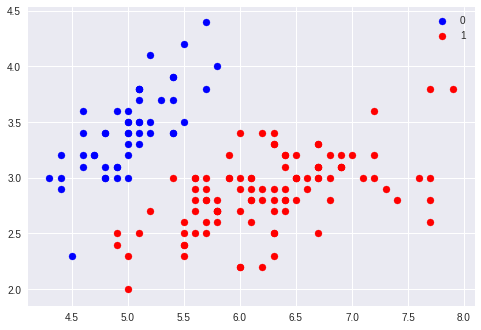

In [0]:
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='1')
plt.legend()

In [0]:
class Logistic:
  def __init__(self,lr=0.01,iter = 100000, fit_intercept =True,verbose = False):
    self.lr =lr
    self.iter=iter
    self.fit_intercept=fit_intercept
    self.verbose = verbose
    
  def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
  def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
  def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
  def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            loss = self.loss(h, y)
    
  def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.theta))
    
  def predict(self, X):
        return self.predict_prob(X).round()

In [0]:
model = Logistic(lr=0.1,iter = 1000)
model.fit(X,Y)

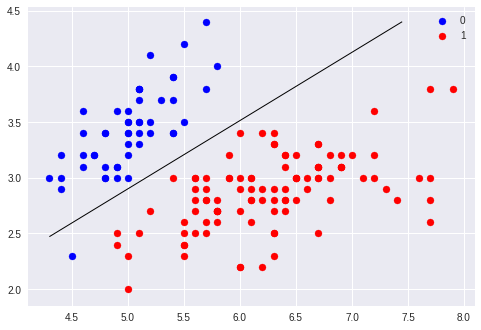

In [16]:
plt.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='b', label='0')
plt.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max()
x2_min, x2_max = X[:,1].min(), X[:,1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black')